In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report 
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary


In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv('Invistico_Airline.csv')

In [5]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Exploratory Analysis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [8]:
df[df['Arrival Delay in Minutes'].isnull()].value_counts('Departure Delay in Minutes')

Departure Delay in Minutes
0      147
1       11
4       11
2       10
16       6
      ... 
123      1
125      1
126      1
127      1
76       1
Length: 121, dtype: int64

In [9]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
df[df.duplicated()]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


In [11]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [12]:
pd.pivot_table(df, index=['satisfaction'],values=['Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support','Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'],  aggfunc=np.sum)

,Baggage handling,Checkin service,Cleanliness,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Online support,Seat comfort
satisfaction,,,,,,,,,,,,,,
dissatisfied,197815,174724,198563,177360,167693,156414,176835,153370,171667,179473,174799,168718,173981,145062
satisfied,282179,259180,282741,211065,283264,214003,211561,286076,250330,273276,275245,266716,283158,223615


In [13]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


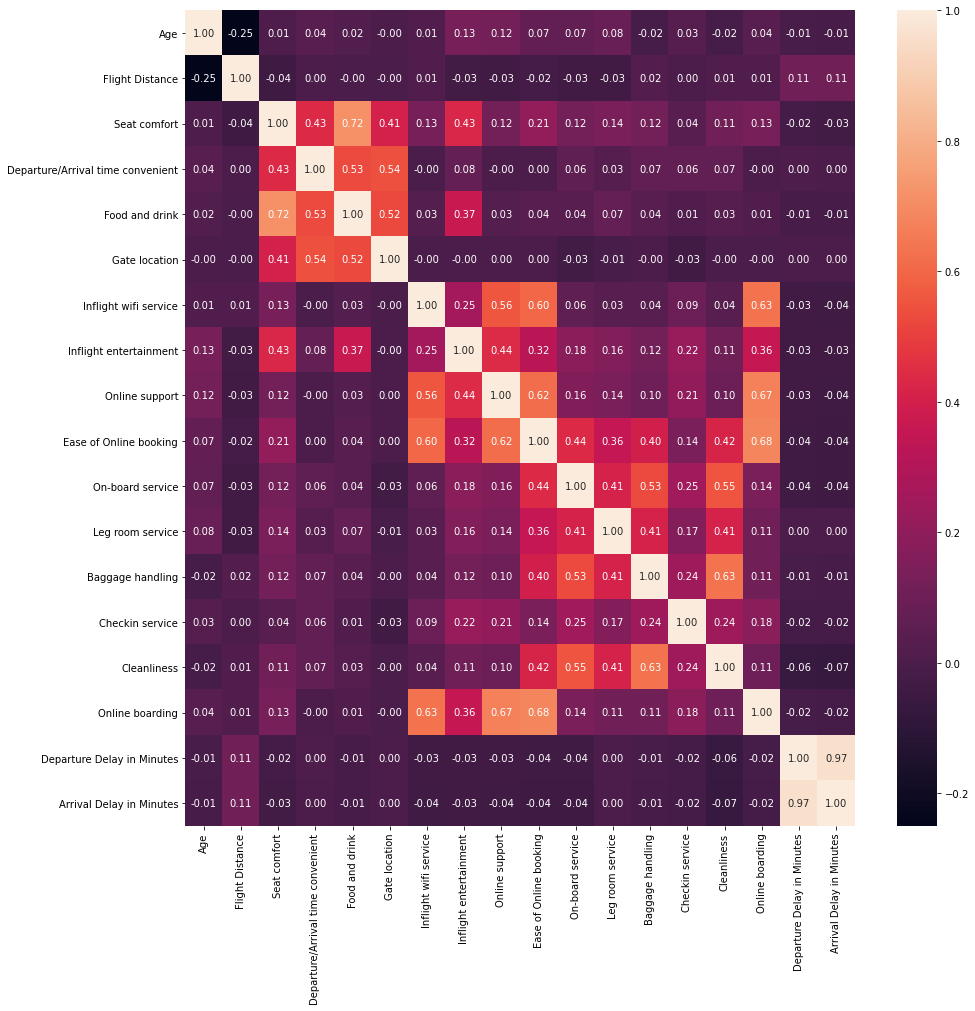

In [16]:
%matplotlib inline
plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()


Dropping the Arival Delay column because due to concerns of colinearity with the departure delay column and due to the arrival delay containing all of out na values

In [17]:
df = df.drop('Arrival Delay in Minutes', axis=1)

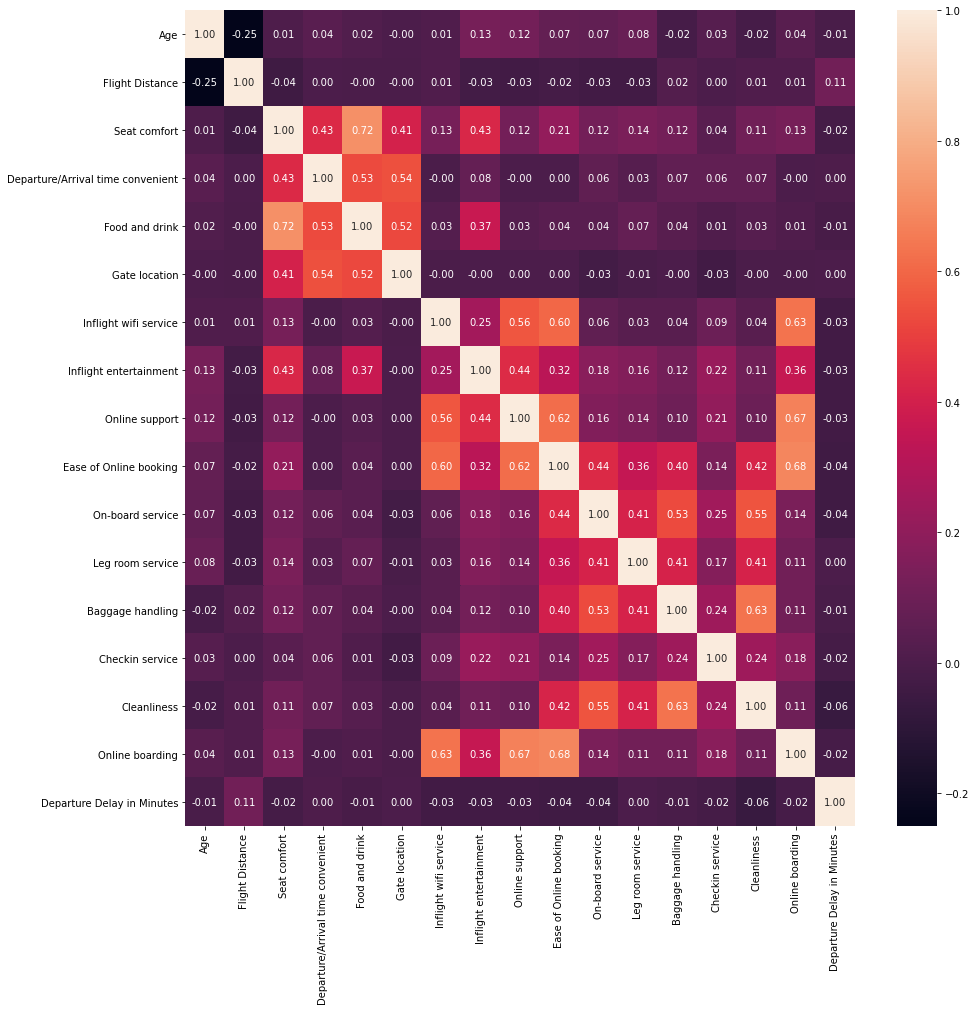

In [18]:
plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

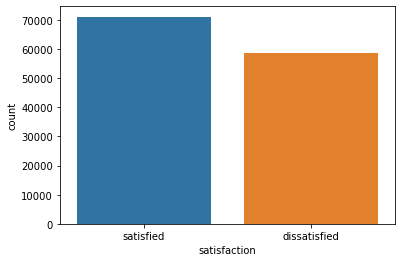

In [19]:
sns.countplot(x = df['satisfaction'])

Relationship between Variables




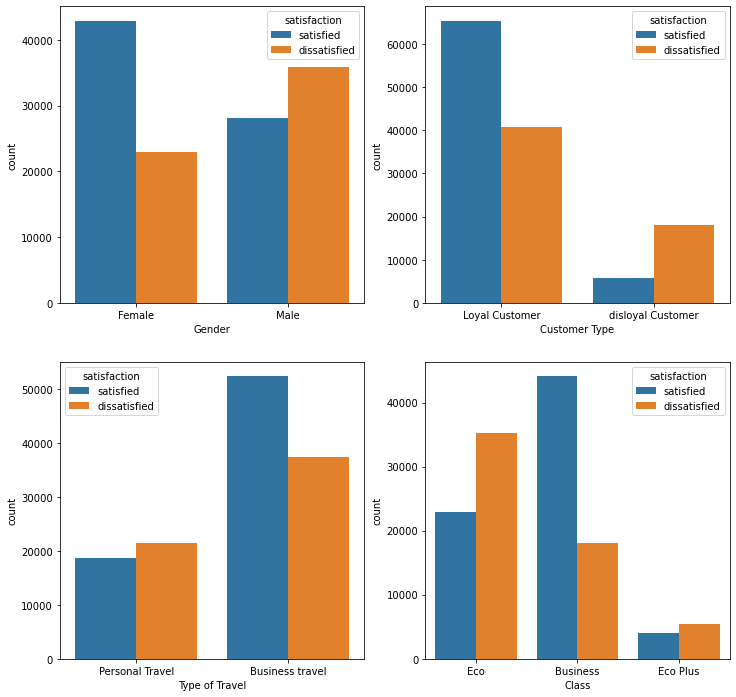

In [20]:
list=['Gender', 'Customer Type','Type of Travel','Class']
count=0
fig,axes = plt.subplots(2,2,figsize=(12, 12))
for i in range(2):
  for j in range(2):
    sns.countplot(data=df,x=list[count],hue='satisfaction',ax=axes[i][j])
    count+=1

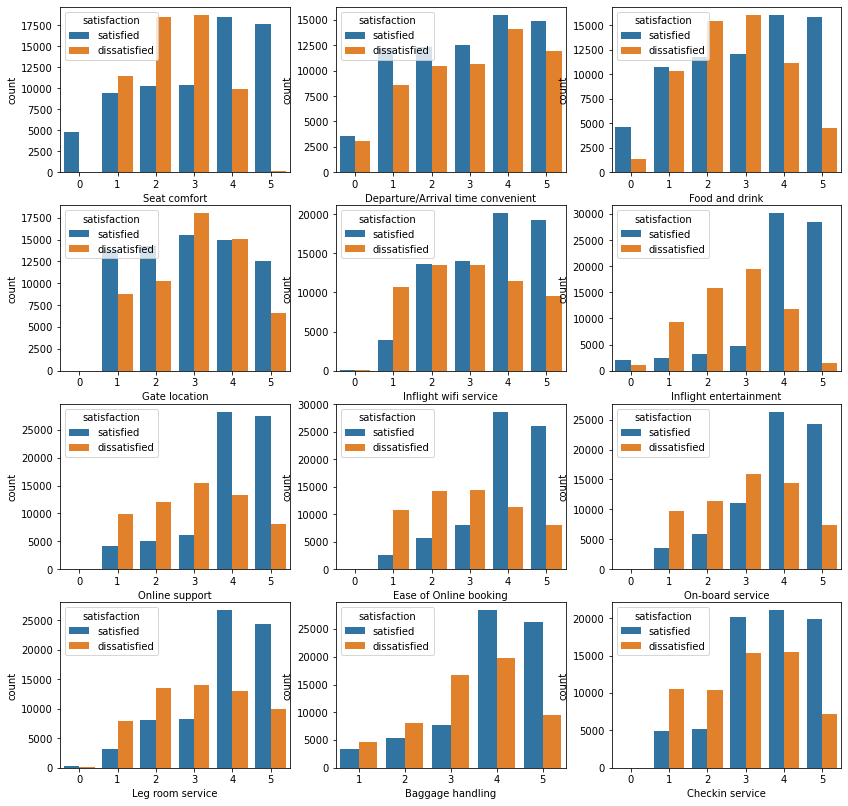

In [21]:
col=['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
count=0
fig,axes = plt.subplots(4,3,figsize=(14, 14))
for i in range(4):
  for j in range(3):
    sns.countplot(data=df,x=col[count],hue='satisfaction',ax=axes[i][j])
    count+=1

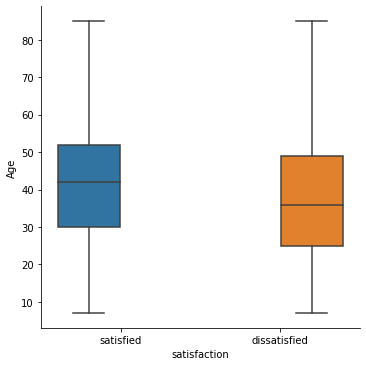

In [22]:
sns.catplot(x='satisfaction',y='Age',data=df,hue='satisfaction',kind='box')

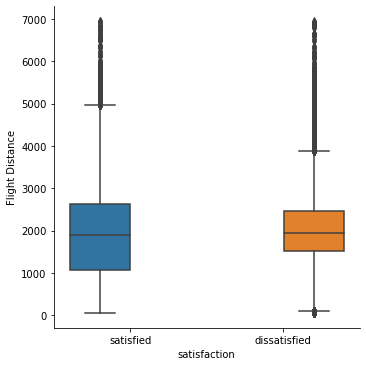

In [23]:
sns.catplot(x='satisfaction',y='Flight Distance',hue='satisfaction',data=df,kind='box')

In this boxplot, the ourliers seem to be international flights and some domestic flights, we decided not to drop the ourliers.

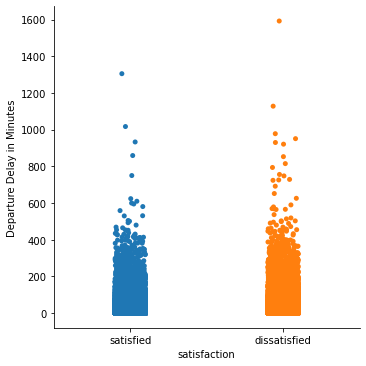

In [24]:
sns.catplot(x='satisfaction',y='Departure Delay in Minutes',data=df,hue='satisfaction')

# Baseline Model *Fitting*

### Data Partitioning

In [25]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [26]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

In [27]:
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], drop_first = True)

In [28]:
df.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus', 'satisfaction_satisfied'],
      dtype='object')

In [29]:
predictors = ['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']
outcome = 'satisfaction_satisfied' # target variable

Defining X and Y

In [30]:
X = df[predictors]
y = df[outcome]

In [31]:
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,5,3,2,0,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,4,2,3,2,310,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,4,2,0,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,4,1,3,0,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,4,2,5,0,0,0,1,1,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90916, 22) (90916,)
Test set: (38964, 22) (38964,)


### Logistic Regression

In [33]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(X_train, y_train)

print('The intercept is', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X_train.columns).sort_values('coefficient',ascending=False))


The intercept is -4.731853809942085
                                   coefficient
Inflight entertainment                0.685262
On-board service                      0.311609
Seat comfort                          0.296165
Checkin service                       0.294551
Ease of Online booking                0.230627
Leg room service                      0.219625
Online boarding                       0.166755
Gate location                         0.114621
Online support                        0.089044
Cleanliness                           0.086964
Baggage handling                      0.086557
Flight Distance                      -0.000109
Departure Delay in Minutes           -0.005260
Age                                  -0.007790
Inflight wifi service                -0.077897
Departure/Arrival time convenient    -0.198196
Food and drink                       -0.227643
Class_Eco                            -0.741388
Type of Travel_Personal Travel       -0.760108
Class_Eco Plus          

Model Evaluation for Logit

In [34]:
print('Evaluation Metrics for Training Set')
print("Accuracy:",accuracy_score(y_train, logit.predict(X_train)))
print("precision score: ", precision_score(y_train,logit.predict(X_train)))
print("recall score: ", recall_score(y_train,logit.predict(X_train)))
print("f1-score: ", f1_score(y_train,logit.predict(X_train)))

Evaluation Metrics for Training Set
Accuracy: 0.8370473843987857
precision score:  0.8504614891785293
recall score:  0.8525610147719974
f1-score:  0.8515099578033697


In [35]:
print('Evaluation Metrics for Test Set')
print("Accuracy:",accuracy_score(y_test, logit.predict(X_test)))
print("precision score: ", precision_score(y_test,logit.predict(X_test)))
print("recall score: ", recall_score(y_test,logit.predict(X_test)))
print("f1-score: ", f1_score(y_test,logit.predict(X_test)))

Evaluation Metrics for Test Set
Accuracy: 0.8319217739451802
precision score:  0.845042678923178
recall score:  0.8473874806001035
f1-score:  0.8462134554420571


### Decision Tree

Decision Tree with a depth of 3

In [36]:
dt_depth_3 = DecisionTreeClassifier(max_depth = 3)
dt_depth_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
dt_importances_depth_3 = dt_depth_3.feature_importances_
dt_df_depth_3 = pd.DataFrame({'feature': X_train.columns, 'importance': dt_importances_depth_3})
dt_df_depth_3 = dt_df_depth_3.sort_values('importance', ascending = False)
print(dt_df_depth_3)

                              feature  importance
7              Inflight entertainment    0.675370
2                        Seat comfort    0.234993
9              Ease of Online booking    0.075369
18    Customer Type_disloyal Customer    0.014269
0                                 Age    0.000000
13                    Checkin service    0.000000
20                          Class_Eco    0.000000
19     Type of Travel_Personal Travel    0.000000
17                        Gender_Male    0.000000
16         Departure Delay in Minutes    0.000000
15                    Online boarding    0.000000
14                        Cleanliness    0.000000
11                   Leg room service    0.000000
12                   Baggage handling    0.000000
1                     Flight Distance    0.000000
10                   On-board service    0.000000
8                      Online support    0.000000
6               Inflight wifi service    0.000000
5                       Gate location    0.000000


In [38]:
plotDecisionTree(dt_depth_3, feature_names=X_train.columns, class_names=dt_depth_3.classes_)

'You need to install pydotplus to visualize decision trees'

In [39]:
print('Evaluation Metrics for Training Set of Decision Tree with a depth of 3')
print("Accuracy:",accuracy_score(y_train, dt_depth_3.predict(X_train)))
print("precision score: ", precision_score(y_train,dt_depth_3.predict(X_train)))
print("recall score: ", recall_score(y_train,dt_depth_3.predict(X_train)))
print("f1-score: ", f1_score(y_train,dt_depth_3.predict(X_train)))

Evaluation Metrics for Training Set of Decision Tree with a depth of 3
Accuracy: 0.8557569624708522
precision score:  0.8827307227157096
recall score:  0.8496708413615928
f1-score:  0.8658853367695486


In [40]:
print('Evaluation Metrics for Test Set of Decision Tree with a depth of 3')
print("Accuracy:",accuracy_score(y_test, dt_depth_3.predict(X_test)))
print("precision score: ", precision_score(y_test,dt_depth_3.predict(X_test)))
print("recall score: ", recall_score(y_test,dt_depth_3.predict(X_test)))
print("f1-score: ", f1_score(y_test,dt_depth_3.predict(X_test)))

Evaluation Metrics for Test Set of Decision Tree with a depth of 3
Accuracy: 0.8523252232830305
precision score:  0.880551602296707
recall score:  0.8438602266848516
f1-score:  0.8618155619596541


Decision Tree with a depth of 4

In [41]:
dt_depth_4 = DecisionTreeClassifier(max_depth = 4)
dt_depth_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [42]:
dt_importances_depth_4 = dt_depth_4.feature_importances_
dt_df_depth_4 = pd.DataFrame({'feature': X_train.columns, 'importance': dt_importances_depth_4})
dt_df_depth_4 = dt_df_depth_4.sort_values('importance', ascending = False)
print(dt_df_depth_4)

                              feature  importance
7              Inflight entertainment    0.639960
2                        Seat comfort    0.232178
9              Ease of Online booking    0.071417
8                      Online support    0.015231
18    Customer Type_disloyal Customer    0.013521
10                   On-board service    0.009760
11                   Leg room service    0.008107
5                       Gate location    0.005491
19     Type of Travel_Personal Travel    0.004041
15                    Online boarding    0.000294
14                        Cleanliness    0.000000
20                          Class_Eco    0.000000
17                        Gender_Male    0.000000
16         Departure Delay in Minutes    0.000000
0                                 Age    0.000000
13                    Checkin service    0.000000
12                   Baggage handling    0.000000
1                     Flight Distance    0.000000
6               Inflight wifi service    0.000000


In [43]:
plotDecisionTree(dt_depth_4, feature_names=X_train.columns, class_names=dt_depth_4.classes_)

'You need to install pydotplus to visualize decision trees'

In [44]:
print('Evaluation Metrics for Training Set of Decision Tree with a depth of 4')
print("Accuracy:",accuracy_score(y_train, dt_depth_4.predict(X_train)))
print("precision score: ", precision_score(y_train,dt_depth_4.predict(X_train)))
print("recall score: ", recall_score(y_train,dt_depth_4.predict(X_train)))
print("f1-score: ", f1_score(y_train,dt_depth_4.predict(X_train)))

Evaluation Metrics for Training Set of Decision Tree with a depth of 4
Accuracy: 0.8697698974877909
precision score:  0.9109399342219144
recall score:  0.8449743095696853
f1-score:  0.8767180341524364


In [45]:
print('Evaluation Metrics for Test Set of Decision Tree with a depth of 4')
print("Accuracy:",accuracy_score(y_test, dt_depth_4.predict(X_test)))
print("precision score: ", precision_score(y_test,dt_depth_4.predict(X_test)))
print("recall score: ", recall_score(y_test,dt_depth_4.predict(X_test)))
print("f1-score: ", f1_score(y_test,dt_depth_4.predict(X_test)))

Evaluation Metrics for Test Set of Decision Tree with a depth of 4
Accuracy: 0.8669797762036752
precision score:  0.9094937353570337
recall score:  0.8398156421953629
f1-score:  0.873266987798616


Decision Tree with a depth of 5

In [46]:
dt_depth_5 = DecisionTreeClassifier(max_depth = 5)
dt_depth_5.fit(X_train, y_train)

dt_importances_depth_5 = dt_depth_5.feature_importances_
dt_df_depth_5 = pd.DataFrame({'feature': X_train.columns, 'importance': dt_importances_depth_5})
dt_df_depth_5 = dt_df_depth_5.sort_values('importance', ascending = False)
print(dt_df_depth_5)

                              feature  importance
7              Inflight entertainment    0.609695
2                        Seat comfort    0.237006
9              Ease of Online booking    0.068071
1                     Flight Distance    0.020483
8                      Online support    0.014360
18    Customer Type_disloyal Customer    0.013589
10                   On-board service    0.013064
11                   Leg room service    0.007644
19     Type of Travel_Personal Travel    0.005483
5                       Gate location    0.005177
3   Departure/Arrival time convenient    0.003006
20                          Class_Eco    0.001606
16         Departure Delay in Minutes    0.000818
15                    Online boarding    0.000000
17                        Gender_Male    0.000000
0                                 Age    0.000000
14                        Cleanliness    0.000000
13                    Checkin service    0.000000
12                   Baggage handling    0.000000


In [47]:
plotDecisionTree(dt_depth_5, feature_names=X_train.columns, class_names=dt_depth_5.classes_)

'You need to install pydotplus to visualize decision trees'

In [48]:
print('Evaluation Metrics for Training Set of Decision Tree with a depth of 5')
print("Accuracy:",accuracy_score(y_train, dt_depth_5.predict(X_train)))
print("precision score: ", precision_score(y_train,dt_depth_5.predict(X_train)))
print("recall score: ", recall_score(y_train,dt_depth_5.predict(X_train)))
print("f1-score: ", f1_score(y_train,dt_depth_5.predict(X_train)))

Evaluation Metrics for Training Set of Decision Tree with a depth of 5
Accuracy: 0.8800321175590655
precision score:  0.907004957225627
recall score:  0.8703235388567758
f1-score:  0.8882857230649472


In [49]:
print('Evaluation Metrics for Test Set of Decision Tree with a depth of 5')
print("Accuracy:",accuracy_score(y_test, dt_depth_5.predict(X_test)))
print("precision score: ", precision_score(y_test,dt_depth_5.predict(X_test)))
print("recall score: ", recall_score(y_test,dt_depth_5.predict(X_test)))
print("f1-score: ", f1_score(y_test,dt_depth_5.predict(X_test)))

Evaluation Metrics for Test Set of Decision Tree with a depth of 5
Accuracy: 0.8766553741915615
precision score:  0.905964773792491
recall score:  0.863612848610262
f1-score:  0.8842819994221324


### Naive Bayes

In [50]:
# run naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [51]:
# predict probabilities
predProb_train = nb.predict_proba(X_train)
predProb_test = nb.predict_proba(X_test)

# predict class membership
y_test_pred = nb.predict(X_test)
y_train_pred = nb.predict(X_train)

In [52]:
# training
classificationSummary(y_train, nb.predict(X_train))

#accuracy of model for training set
print('\nAccuracy on train is', round(accuracy_score(y_train,y_train_pred),2))
print('Precision score on train is', round(precision_score(y_train,y_train_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_train,y_train_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_train,y_train_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.8212)

       Prediction
Actual     0     1
     0 33106  7986
     1  8270 41554

Accuracy on train is 0.82
Precision score on train is 0.84
Recall score on train is 0.83
F1 score on train is 0.84


In [53]:
# validation set
classificationSummary(y_test, nb.predict(X_test))

#accuracy of model for validation set
print('\nAccuracy on train is', round(accuracy_score(y_test,y_test_pred),2))
print('Precision score on train is', round(precision_score(y_test,y_test_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_test,y_test_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_test,y_test_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.8186)

       Prediction
Actual     0     1
     0 14167  3534
     1  3534 17729

Accuracy on train is 0.82
Precision score on train is 0.83
Recall score on train is 0.83
F1 score on train is 0.83


In [54]:
NB_varimportance_0 = pd.DataFrame({'attribute': X_train.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
1,Flight Distance,2026.963618
0,Age,37.453738
16,Departure Delay in Minutes,17.908960
14,Cleanliness,3.373114
12,Baggage handling,3.364280
11,Leg room service,3.045873
3,Departure/Arrival time convenient,3.017351
5,Gate location,3.008493
13,Checkin service,2.972987
10,On-board service,2.971844


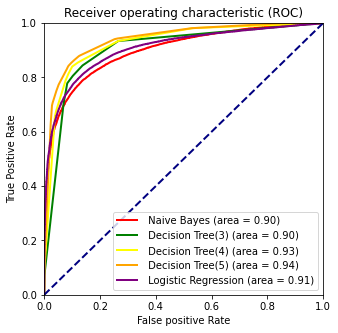

In [55]:
def roc_graph(nb,dt_depth_3,dt_depth_4,dt_depth_5,logit,y_test,X_test):
    nb_fpr,nb_tpr, _ = roc_curve(y_test,nb.predict_proba(X_test)[:,1],pos_label = 1)
    nb_roc_auc = auc(nb_fpr,nb_tpr)
    dt_depth_3_fpr,dt_depth_3_tpr, _ = roc_curve(y_test,dt_depth_3.predict_proba(X_test)[:,1],pos_label = 1)
    dt_depth_3_roc_auc = auc(dt_depth_3_fpr,dt_depth_3_tpr)
    dt_depth_4_fpr,dt_depth_4_tpr, _ = roc_curve(y_test,dt_depth_4.predict_proba(X_test)[:,1],pos_label = 1)
    dt_depth_4_roc_auc = auc(dt_depth_4_fpr,dt_depth_4_tpr)
    dt_depth_5_fpr,dt_depth_5_tpr, _ = roc_curve(y_test,dt_depth_5.predict_proba(X_test)[:,1],pos_label = 1)
    dt_depth_5_roc_auc = auc(dt_depth_5_fpr,dt_depth_5_tpr)
    logit_fpr,logit_tpr, _ = roc_curve(y_test,logit.predict_proba(X_test)[:,1],pos_label = 1)
    logit_roc_auc = auc(logit_fpr,logit_tpr)
    plt.figure(figsize=[5,5])
    plt.plot(nb_fpr,nb_tpr,color='red',
            lw=2, label=' Naive Bayes (area = %0.2f)' % nb_roc_auc)
    plt.plot(dt_depth_3_fpr,dt_depth_3_tpr,color='green',
            lw=2, label=' Decision Tree(3) (area = %0.2f)' % dt_depth_3_roc_auc)
    plt.plot(dt_depth_4_fpr,dt_depth_4_tpr,color='yellow',
            lw=2, label=' Decision Tree(4) (area = %0.2f)' % dt_depth_4_roc_auc)
    plt.plot(dt_depth_5_fpr,dt_depth_5_tpr,color='orange',
            lw=2, label=' Decision Tree(5) (area = %0.2f)' % dt_depth_5_roc_auc)
    plt.plot(logit_fpr,logit_tpr,color='purple',
            lw=2, label=' Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
    
roc_graph(nb,dt_depth_3,dt_depth_4,dt_depth_5,logit,y_test,X_test)

Decision Tree with a depth of 5 has the highest AUC.

# Feature Engineering

The most important attributes from decision tree is: 'Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support'

In [56]:
dt_predictors_1 = ['Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support']
dt_outcome_1 = 'satisfaction_satisfied' # target variable

In [57]:
dt_X_1 = df[dt_predictors_1]
dt_y_1 = df[dt_outcome_1]

In [58]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( dt_X_1, dt_y_1, test_size=0.3, random_state=4)
print ('Train set:', X_train_1.shape,  y_train_1.shape)
print ('Test set:', X_test_1.shape,  y_test_1.shape)

Train set: (90916, 5) (90916,)
Test set: (38964, 5) (38964,)


In [59]:
dt_1 = DecisionTreeClassifier(max_depth = 5)
dt_1.fit(X_train_1, y_train_1)
dt_importances_1 = dt_1.feature_importances_
dt_df_1 = pd.DataFrame({'feature': X_train_1.columns, 'importance': dt_importances_1})
dt_df_1 = dt_df_1.sort_values('importance', ascending = False)
print(dt_df_1)

                  feature  importance
0  Inflight entertainment    0.633050
1            Seat comfort    0.237333
2  Ease of Online booking    0.086809
3        On-board service    0.024923
4          Online support    0.017886


In [60]:
print("Accuracy:",accuracy_score(y_test_1, dt_1.predict(X_test_1)))
print("precision score: ", precision_score(y_test_1,dt_1.predict(X_test_1)))
print("recall score: ", recall_score(y_test_1,dt_1.predict(X_test_1)))
print("f1-score: ", f1_score(y_test_1,dt_1.predict(X_test_1)))

Accuracy: 0.8681860178626425
precision score:  0.8986109051361906
recall score:  0.8549122889526407
f1-score:  0.8762171020919696


#### PCA (based on decision tree)

In [61]:
pcs_dt = PCA(n_components=5)
pcs_dt.fit(df[['Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support']])

pcsSummary_dt = pd.DataFrame({'Standard deviation': np.sqrt(pcs_dt.explained_variance_),
                           'Proportion of variance': pcs_dt.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs_dt.explained_variance_ratio_)})
pcsSummary_dt = pcsSummary_dt.transpose()
pcsSummary_dt.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary_dt.round(4)

,PC1,PC2,PC3,PC4,PC5
Standard deviation,1.9913,1.3848,1.2100,0.9790,0.6879
Proportion of variance,0.4517,0.2185,0.1668,0.1092,0.0539
Cumulative proportion,0.4517,0.6701,0.8369,0.9461,1.0000


In [62]:
scores_dt = pd.DataFrame(pcs_dt.transform(df[['Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support']]), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores_dt.head()

,PC1,PC2,PC3,PC4,PC5
0,1.906744,1.097240,-0.501983,-1.998487,-1.449435
1,2.590318,2.076769,0.777782,-0.888799,-0.610362
2,4.422619,2.044351,0.443036,0.441543,0.261280
3,3.086210,0.012534,-2.678992,-2.042464,-0.149061
4,2.265476,1.352675,-2.104181,-1.094882,0.400572


USE PC SCORES TO RUN MODEL

In [63]:
dt_predictors_1 = ['PC1','PC2','PC3','PC4']
dt_outcome = 'satisfaction_satisfied' # target variable

In [64]:
dt_X = scores_dt[dt_predictors_1]
dt_y = df[dt_outcome]

In [65]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split( dt_X, dt_y, test_size=0.3, random_state=4)
print ('Train set:', X_train_dt.shape,  y_train_dt.shape)
print ('Test set:', X_test_dt.shape,  y_test_dt.shape)

Train set: (90916, 4) (90916,)
Test set: (38964, 4) (38964,)


In [66]:
dt_2 = DecisionTreeClassifier(max_depth = 5)
dt_2.fit(X_train_dt, y_train_dt)
dt_importances_2 = dt_2.feature_importances_
dt_df_2 = pd.DataFrame({'feature': X_train_dt.columns, 'importance': dt_importances_2})
dt_df_2 = dt_df_2.sort_values('importance', ascending = False)
print(dt_df_2)

  feature  importance
0     PC1    0.656904
1     PC2    0.167029
3     PC4    0.142419
2     PC3    0.033649


In [67]:
print("Accuracy:",accuracy_score(y_test_dt, dt_2.predict(X_test_dt)))
print("precision score: ", precision_score(y_test_dt,dt_2.predict(X_test_dt)))
print("recall score: ", recall_score(y_test_dt,dt_2.predict(X_test_dt)))
print("f1-score: ", f1_score(y_test_dt,dt_2.predict(X_test_dt)))

Accuracy: 0.8445231495739657
precision score:  0.8479245801107501
recall score:  0.871372807223816
f1-score:  0.8594887971424594


**PCA (based on logistic)**

The most important attributes from logistic regression: 'Customer Type_disloval Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel','Inflight entertainment'.


In [68]:
l_predictors = ['Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel','Inflight entertainment']
l_outcome = 'satisfaction_satisfied' # target variable

In [69]:
l_X = df[l_predictors]
l_y = df[l_outcome]

In [70]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split( l_X, l_y, test_size=0.3, random_state=4)
print ('Train set:', X_train_l.shape,  y_train_l.shape)
print ('Test set:', X_test_l.shape,  y_test_l.shape)

Train set: (90916, 5) (90916,)
Test set: (38964, 5) (38964,)


In [71]:
logit_1 = LogisticRegression(penalty="l2", solver='liblinear')
logit_1.fit(X_train_l, y_train_l)

print('The intercept is', logit_1.intercept_[0])
print(pd.DataFrame({'coefficient': logit_1.coef_[0]}, index=X_train_l.columns).sort_values('coefficient',ascending=False))

The intercept is -1.7629002014226036
                                 coefficient
Inflight entertainment              0.892625
Class_Eco Plus                     -0.479282
Type of Travel_Personal Travel     -0.860327
Gender_Male                        -0.910049
Customer Type_disloyal Customer    -1.733787


Accuracy of the model with ONLY the most important attributes

In [72]:
print("Accuracy:",accuracy_score(y_test_l, logit_1.predict(X_test_l)))
print("precision score: ", precision_score(y_test_l,logit_1.predict(X_test_l)))
print("recall score: ", recall_score(y_test_l,logit_1.predict(X_test_l)))
print("f1-score: ", f1_score(y_test_l,logit_1.predict(X_test_l)))

Accuracy: 0.7706857612154809
precision score:  0.7447197077973639
recall score:  0.8821897192305883
f1-score:  0.8076467675615165


In [73]:
pcs_logit = PCA(n_components=5)
pcs_logit.fit(df[['Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel','Inflight entertainment']])

pcsSummary_logit = pd.DataFrame({'Standard deviation': np.sqrt(pcs_logit.explained_variance_),
                           'Proportion of variance': pcs_logit.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs_logit.explained_variance_ratio_)})
pcsSummary_logit = pcsSummary_logit.transpose()
pcsSummary_logit.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary_logit.round(4)

,PC1,PC2,PC3,PC4,PC5
Standard deviation,1.3520,0.5014,0.4901,0.3269,0.2565
Proportion of variance,0.7335,0.1009,0.0964,0.0429,0.0264
Cumulative proportion,0.7335,0.8344,0.9307,0.9736,1.0000


In [74]:
scores_logit = pd.DataFrame(pcs_logit.transform(df[['Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel','Inflight entertainment']]), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores_logit.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.637340,-0.181527,0.805677,0.188564,-0.120928
1,1.412609,-0.796994,0.163450,0.109216,-0.133490
2,3.343401,-0.066229,0.985882,-0.133962,-0.183405
3,-0.637340,-0.181527,0.805677,0.188564,-0.120928
4,0.357845,-0.152703,0.850728,0.107933,-0.136547


USE PC SCORES TO RUN MODEL

In [75]:
ll_predictors = ['PC1','PC2','PC3','PC4']
ll_outcome = 'satisfaction_satisfied' # target variable

In [76]:
ll_X = scores_logit[ll_predictors]
ll_y = df[ll_outcome]

In [77]:
X_train_ll, X_test_ll, y_train_ll, y_test_ll = train_test_split( ll_X, ll_y, test_size=0.3, random_state=4)
print ('Train set:', X_train_ll.shape,  y_train_ll.shape)
print ('Test set:', X_test_ll.shape,  y_test_ll.shape)

Train set: (90916, 4) (90916,)
Test set: (38964, 4) (38964,)


In [78]:
logit_2 = LogisticRegression(penalty="l2", solver='liblinear')
logit_2.fit(X_train_ll, y_train_ll)

LogisticRegression(solver='liblinear')

In [79]:
print("Accuracy:",accuracy_score(y_test_ll, logit_2.predict(X_test_ll)))
print("precision score: ", precision_score(y_test_ll,logit_2.predict(X_test_ll)))
print("recall score: ", recall_score(y_test_ll,logit_2.predict(X_test_ll)))
print("f1-score: ", f1_score(y_test_ll,logit_2.predict(X_test_ll)))

Accuracy: 0.7923981110768915
precision score:  0.8006389776357827
recall score:  0.825001175751305
f1-score:  0.8126375280846827


#### PCA (based on nb)


The most important attributes from nb: 'Flight Distance','Age','Arrival Delay in Minutes','Departure Delay in Minutes','Cleanliness'.

In [80]:
n_predictors = ['Flight Distance','Age','Departure Delay in Minutes','Cleanliness','Baggage handling']
n_outcome = 'satisfaction_satisfied' # target variable

In [81]:
n_X = df[n_predictors]
n_y = df[n_outcome]

In [82]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split( n_X, n_y, test_size=0.3, random_state=4)


In [83]:
nb_1=nb.fit(X_train_n, y_train_n)

In [84]:
predProb_train_1 = nb_1.predict_proba(X_train_n)
predProb_test_1 = nb_1.predict_proba(X_test_n)

# predict class membership
y_test_pred_1 = nb_1.predict(X_test_n)
y_train_pred_1 = nb_1.predict(X_train_n)

Accuracy of the model with ONLY the most important attributes

In [85]:
classificationSummary(y_test_n, nb_1.predict(X_test_n))

#accuracy of model for validation set
print('\nAccuracy on train is', round(accuracy_score(y_test_n,y_test_pred_1),2))
print('Precision score on train is', round(precision_score(y_test_n,y_test_pred_1, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_test_n,y_test_pred_1, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_test_n,y_test_pred_1, pos_label = 1),2))

Confusion Matrix (Accuracy 0.6373)

       Prediction
Actual     0     1
     0  8398  9303
     1  4829 16434

Accuracy on train is 0.64
Precision score on train is 0.64
Recall score on train is 0.77
F1 score on train is 0.7


In [86]:
pcs_nb = PCA(n_components=5)
pcs_nb.fit(df[['Flight Distance','Age','Departure Delay in Minutes','Cleanliness','Baggage handling']])

pcsSummary_nb = pd.DataFrame({'Standard deviation': np.sqrt(pcs_nb.explained_variance_),
                           'Proportion of variance': pcs_nb.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs_nb.explained_variance_ratio_)})
pcsSummary_nb = pcsSummary_nb.transpose()
pcsSummary_nb.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary_nb.round(4)

,PC1,PC2,PC3,PC4,PC5
Standard deviation,1027.1315,37.8303,14.6373,1.4727,0.699
Proportion of variance,0.9984,0.0014,0.0002,0.0000,0.000
Cumulative proportion,0.9984,0.9998,1.0000,1.0000,1.000


In [87]:
scores_nb = pd.DataFrame(pcs_nb.transform(df[['Flight Distance','Age','Departure Delay in Minutes','Cleanliness','Baggage handling']]), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores_nb.head()

,PC1,PC2,PC3,PC4,PC5
0,-1716.537957,-7.367243,19.332309,0.935282,-0.029177
1,483.789219,293.340837,6.700551,-0.197243,-0.383775
2,156.616841,-15.583233,-23.713273,-0.360111,-0.027089
3,-1358.525188,-8.891384,15.665790,3.779766,-0.042157
4,-1627.557743,-7.688593,24.664535,2.344418,-0.034130


USE PC SCORES TO RUN MODEL

In [88]:
nn_predictors = ['PC1','PC2']
nn_outcome = 'satisfaction_satisfied' # target variable

In [89]:
nn_X = scores_nb[nn_predictors]
nn_y = df[nn_outcome]

In [90]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split( nn_X, nn_y, test_size=0.3, random_state=4)

In [91]:
nb_2=nb.fit(X_train_nn, y_train_nn)

In [92]:
predProb_train_2 = nb_2.predict_proba(X_train_nn)
predProb_test_2 = nb_2.predict_proba(X_test_nn)

# predict class membership
y_test_pred_2 = nb_2.predict(X_test_nn)
y_train_pred_2 = nb_2.predict(X_train_nn)

In [93]:
classificationSummary(y_test_nn, nb_2.predict(X_test_nn))

#accuracy of model for validation set
print('\nAccuracy on train is', round(accuracy_score(y_test_nn,y_test_pred_2),2))
print('Precision score on train is', round(precision_score(y_test_nn,y_test_pred_2, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_test_nn,y_test_pred_2, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_test_nn,y_test_pred_2, pos_label = 1),2))

Confusion Matrix (Accuracy 0.5573)

       Prediction
Actual     0     1
     0  1881 15820
     1  1430 19833

Accuracy on train is 0.56
Precision score on train is 0.56
Recall score on train is 0.93
F1 score on train is 0.7


PCA for all importance attributes


In [94]:
pcs_all = PCA(n_components=5)
pcs_all.fit(df[['Flight Distance','Baggage handling','Age','Departure Delay in Minutes','Cleanliness','Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support','Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel']])

pcsSummary_all = pd.DataFrame({'Standard deviation': np.sqrt(pcs_all.explained_variance_),
                           'Proportion of variance': pcs_all.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs_all.explained_variance_ratio_)})
pcsSummary_all = pcsSummary_all.transpose()
pcsSummary_all.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary_all.round(4)

,PC1,PC2,PC3,PC4,PC5
Standard deviation,1027.1315,37.8304,14.6401,2.1283,1.5617
Proportion of variance,0.9984,0.0014,0.0002,0.0000,0.0000
Cumulative proportion,0.9984,0.9998,1.0000,1.0000,1.0000


In [95]:
scores_all = pd.DataFrame(pcs_all.transform(df[['Flight Distance','Baggage handling','Age','Departure Delay in Minutes','Cleanliness','Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support','Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel']]), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores_all.head()

,PC1,PC2,PC3,PC4,PC5
0,-1716.537776,-7.362813,19.311171,2.446030,-0.913761
1,483.789474,293.344807,6.680216,1.340995,-2.574567
2,156.617180,-15.573805,-23.778324,3.095096,-3.204598
3,-1358.524914,-8.883386,15.632726,5.136920,1.844937
4,-1627.557540,-7.683010,24.639981,3.707322,0.374707


In [96]:
predictors_all = ['PC1','PC2']
outcome_all = 'satisfaction_satisfied' # target variable

X_all = scores_all[predictors_all]
y_all = df[outcome_all]

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split( X_all, y_all, test_size=0.3, random_state=4)



In [97]:
dt_all = DecisionTreeClassifier(max_depth = 5)
dt_all.fit(X_train_all, y_train_all)
dt_importances_all = dt_all.feature_importances_
dt_df_all = pd.DataFrame({'feature': X_train_all.columns, 'importance': dt_importances_all})
dt_df_all = dt_df_all.sort_values('importance', ascending = False)
print(dt_df_all)

  feature  importance
0     PC1    0.862729
1     PC2    0.137271


In [98]:
print("Accuracy:",accuracy_score(y_test_all, dt_all.predict(X_test_all)))
print("precision score: ", precision_score(y_test_all,dt_all.predict(X_test_all)))
print("recall score: ", recall_score(y_test_all,dt_all.predict(X_test_all)))
print("f1-score: ", f1_score(y_test_all,dt_all.predict(X_test_all)))

Accuracy: 0.5952417616261164
precision score:  0.6526064243636768
recall score:  0.5522739030240323
f1-score:  0.5982627302137198


# Model Builing

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

We build three models (Logistic Regression, Decision Tree and Naive Bayes) above for our airline analysis, and we tried three different depth for decision tree. Among those models, Decision Tree with a depth of 5 has a hightest accuracy of 87.6% while Naive Bayes has a lowest accuracy of 82%. In addition, Decision Tree with a depth of 5 has a overall high precision score, recall score, and the highest AUC. Therefore, Decision Tree is the best model to predict customers' satisfaction.  

Since we find out the most important attributes from decision tree are as following: 'Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support'. We will set them as our predictors for the model.

In [99]:
predictorsnew = ['Seat comfort', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service']
outcome = 'satisfaction_satisfied'

In [100]:
X_final=df[predictorsnew]
y_final=df[outcome]

In [101]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split( X_final, y_final, test_size=0.3, random_state=4)
print ('Train set:', X_train_final.shape,  y_train_final.shape)
print ('Test set:', X_test_final.shape,  y_test_final.shape)

Train set: (90916, 5) (90916,)
Test set: (38964, 5) (38964,)


In [102]:
dt_final = DecisionTreeClassifier(max_depth = 5)
dt_final.fit(X_train_final, y_train_final)

dt_importances_final = dt_final.feature_importances_
dt_df_final = pd.DataFrame({'feature': X_train_final.columns, 'importance': dt_importances_final})
dt_df_final = dt_df_final.sort_values('importance', ascending = False)
print(dt_df_final)

                  feature  importance
1  Inflight entertainment    0.633050
0            Seat comfort    0.237333
3  Ease of Online booking    0.086809
4        On-board service    0.024923
2          Online support    0.017886


In [103]:
plotDecisionTree(dt_final, feature_names=predictorsnew, class_names=dt_final.classes_)

'You need to install pydotplus to visualize decision trees'